In [54]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

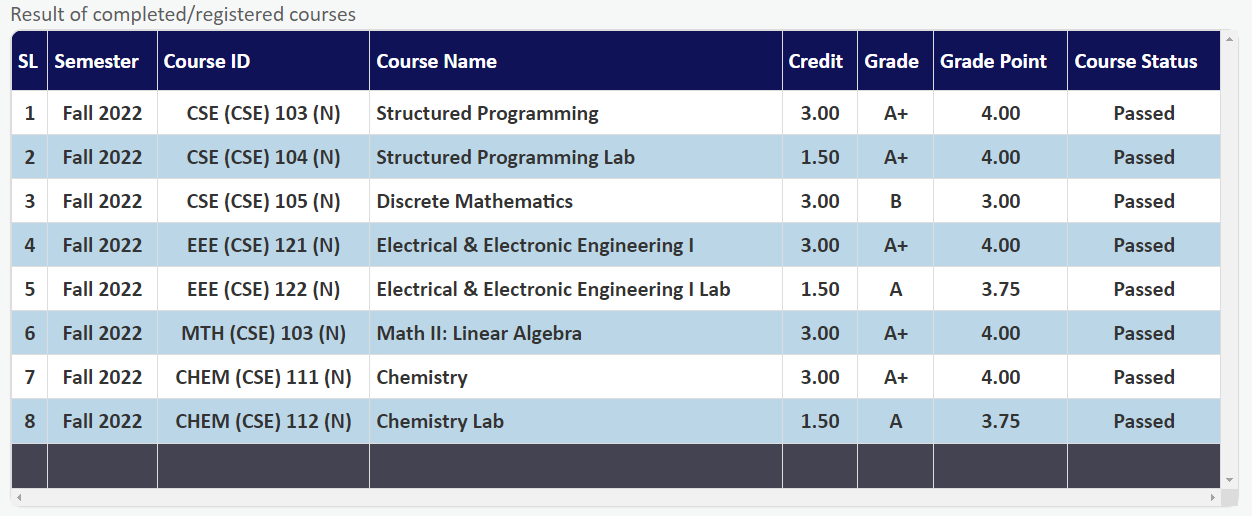

In [55]:
from IPython.display import Image
Image('result.png')

In [56]:
df = pd.read_excel('shoe.xlsx')

In [57]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


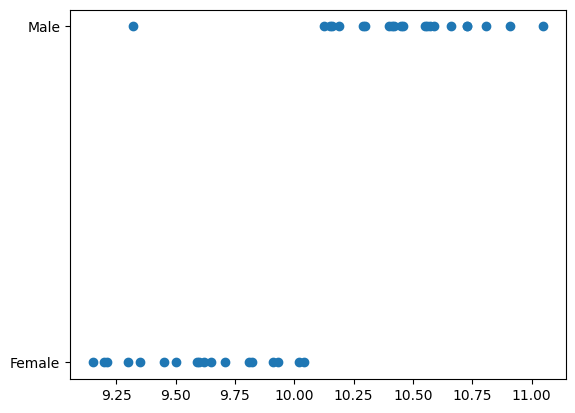

In [58]:
plt.scatter(df['size(cm)'], df['class(y)'])

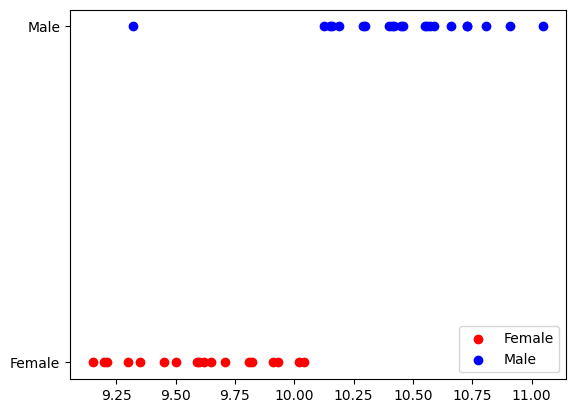

In [59]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']
plt.scatter(df0['size(cm)'], df0['class(y)'], color = 'red', label = 'Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color = 'blue', label = 'Male')
plt.legend()

### Preprocessing

In [60]:
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1, 0])

In [61]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [62]:
from sklearn.model_selection import train_test_split as tts

In [63]:
xtrain, xtest, ytrain, ytest = tts(df[['size(cm)']], df[['class(y)']], test_size = 0.3, random_state = 55)

In [64]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [65]:
ytrain.head()

,class(y)
31,0
25,1
36,0
14,1
16,0


In [66]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [67]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [68]:
m = reg.coef_
m

array([[2.10745564]])

In [69]:
c = reg.intercept_
c

array([-20.81422921])

In [70]:
pred = reg.predict(xtest)

In [71]:
reg.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [72]:
ytest.head()

,class(y)
22,0
3,0
2,1
38,0
6,0


In [73]:
Log_score = reg.score(xtest, ytest)
Log_score

0.9166666666666666

In [74]:
mae1 = mean_absolute_error(ytest, pred)
mae1

0.08333333333333333

In [75]:
mse1 = mean_squared_error(ytest, pred)
mse1

0.08333333333333333

In [76]:
data = {'Name': ['Logisitic_mae', 'Logistic_mse', 'Logistic_accuracy'], 
        'Accuracy': [mae1, mse1, Log_score]}

In [77]:
df_after_pred = pd.DataFrame(data = data)

In [78]:
df_after_pred.head()

,Name,Accuracy
0,Logisitic_mae,0.083333
1,Logistic_mse,0.083333
2,Logistic_accuracy,0.916667


In [79]:
import seaborn as sns

<Axes: xlabel='Name', ylabel='Accuracy'>

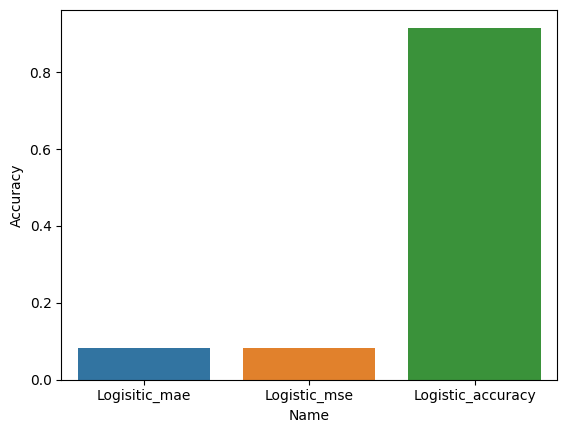

In [80]:
sns.barplot(x = 'Name', y = 'Accuracy', data = df_after_pred)